In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
pip install opencv-contrib-python --user

Note: you may need to restart the kernel to use updated packages.


(<matplotlib.image.AxesImage at 0x27b02784e80>,
 (-0.5, 1521.5, 757.5, -0.5),
 Text(0.5, 1.0, 'sift'))

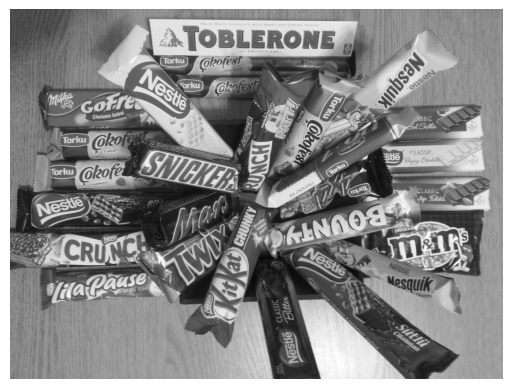

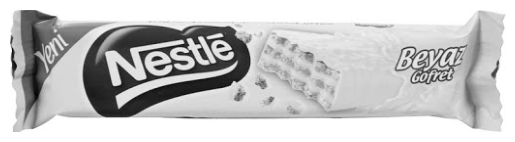

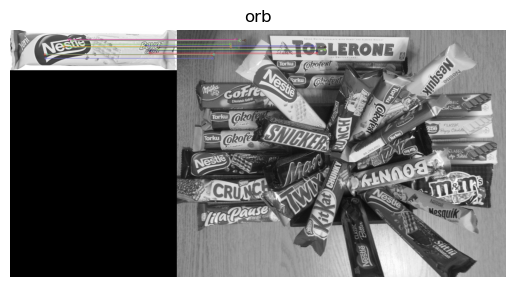

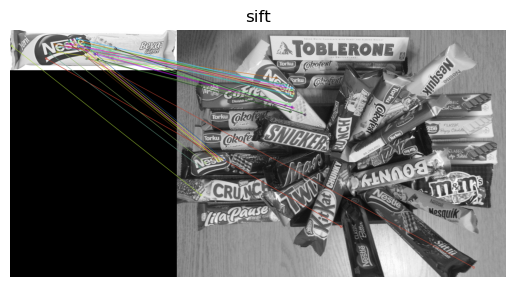

In [9]:
# ana görüntüyü içe aktar
chos = cv2.imread("chocolates.jpg", 0)
plt.figure(), plt.imshow(chos, cmap = "gray"),plt.axis("off")

# aranacak olan görüntü
cho = cv2.imread("nestle.jpg", 0)
plt.figure(), plt.imshow(cho, cmap = "gray"),plt.axis("off")

#orb tanimlayicisi, goruntu ve aradigimiz nesne arasindaki anahtar noktalari tespit edicek
#anahtar noktalar kose kenar gibi nesneye ait ozellikler
orb = cv2.ORB_create()

#anahtar nokta tespiti
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(cho, None)

#bf matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

#noktalari eslestir
matches = bf.match(des1, des2)

#mesafeye gore sirala
matches  = sorted(matches, key = lambda x: x.distance)

#eslesen resimleri gorsellestir
plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match), plt.axis("off"),plt.title("orb")

#sift ile yapimi
sift = cv2.xfeatures2d.SIFT_create()


# bf
bf = cv2.BFMatcher()

# anahtar nokta tespiti sift ile
kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k = 2)

guzel_eslesme = []

for match1, match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        guzel_eslesme.append([match1])
    
plt.figure()
sift_matches = cv2.drawMatchesKnn(cho,kp1,chos,kp2,guzel_eslesme,None, flags = 2)
plt.imshow(sift_matches), plt.axis("off"), plt.title("sift")